In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [2]:
df = pd.read_csv('/content/Titanic-Dataset.csv')

In [ ]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


In [3]:
df.shape

(891, 12)

In [9]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [5]:
df.drop('Cabin', axis=1, inplace=True)

In [6]:
df.drop(['Name','Ticket'], axis=1, inplace=True)

In [7]:
df.drop(['PassengerId'], axis=1, inplace=True)

In [8]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [10]:
age_avg = df['Age'].mean()
df['Age'].fillna(age_avg, inplace=True)

In [11]:
embarked_mode = df['Embarked'].mode()[0]
df['Embarked'].fillna(embarked_mode, inplace=True)

In [12]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [13]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [14]:
sns.set()

<Axes: xlabel='Sex', ylabel='count'>

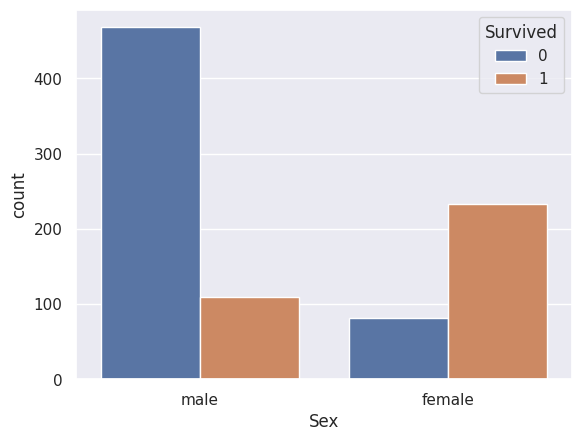

In [15]:
sns.countplot(x='Sex', hue= 'Survived', data=df)

In [16]:
df.replace({'Sex':{'male':0, 'female':1}}, inplace=True)

In [17]:
df.replace({'Embarked':{'S':0, 'C':1 , 'Q':2}}, inplace=True)

In [18]:
df['Embarked'].unique()

array([0, 1, 2])

In [19]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,0
1,1,1,1,38.0,1,0,71.2833,1
2,1,3,1,26.0,0,0,7.9250,0
3,1,1,1,35.0,1,0,53.1000,0
4,0,3,0,35.0,0,0,8.0500,0


In [20]:
X = df.drop(['Survived'], axis=1)
y = df['Survived']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [22]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [23]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [24]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier()

In [25]:
y_train_pred = dt_model.predict(X_train_scaled)
y_test_pred = dt_model.predict(X_test_scaled)

In [26]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.9859550561797753
Test Accuracy:  0.7653631284916201


In [27]:
ada_model = AdaBoostClassifier()
ada_model.fit(X_train_scaled, y_train)

AdaBoostClassifier()

In [28]:
y_train_pred = ada_model.predict(X_train_scaled)
y_test_pred = ada_model.predict(X_test_scaled)

In [29]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [30]:
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.848314606741573
Test Accuracy:  0.7541899441340782


In [31]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_scaled, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [32]:
y_train_pred = xgb_model.predict(X_train_scaled)
y_test_pred = xgb_model.predict(X_test_scaled)

In [33]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [34]:
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.973314606741573
Test Accuracy:  0.7988826815642458


In [35]:
rf_model= RandomForestClassifier()
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [36]:
y_train_pred = rf_model.predict(X_train_scaled)
y_test_pred = rf_model.predict(X_test_scaled)

In [37]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [38]:
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.9859550561797753
Test Accuracy:  0.7988826815642458


In [41]:
GNB_Model = GaussianNB()
GNB_Model.fit(X_train_scaled, y_train)

GaussianNB()

In [42]:
y_train_pred = GNB_Model.predict(X_train_scaled)
y_test_pred = GNB_Model.predict(X_test_scaled)

In [43]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

In [45]:
print('Train Accuracy: ', train_accuracy)
print('Test Accuracy: ', test_accuracy)

Train Accuracy:  0.7935393258426966
Test Accuracy:  0.7597765363128491
